In [1]:
library(copula)

In [2]:
?copula::ellipCopula

ellipCopula               package:copula               R Documentation

_C_o_n_s_t_r_u_c_t_i_o_n _o_f _E_l_l_i_p_t_i_c_a_l _C_o_p_u_l_a _C_l_a_s_s _O_b_j_e_c_t

_D_e_s_c_r_i_p_t_i_o_n:

     Constructs an elliptical copula class object with its
     corresponding parameters and dimension.

_U_s_a_g_e:

     ellipCopula (family, param, dim = 2, dispstr = "ex", df = 4, ...)
     normalCopula(param, dim = 2, dispstr = "ex")
         tCopula (param, dim = 2, dispstr = "ex", df = 4, df.fixed = FALSE)
     
_A_r_g_u_m_e_n_t_s:

  family: a character string specifying the family of an elliptical
          copula. Implemented families are "normal" and "t".

   param: a numeric vector specifying the parameter values.  The
          'getRho()' method accesses this vector, whereas 'p2P()' and
          'getSigma()' provide the corresponding "Rho" matrix, see
          below.

     dim: the dimension of the copula.

 dispstr: a character string specifying the type of the symmetric
          positive definite matrix characterizing the elliptical
          copula. Implemented structures are "ex" for exchangeable,
          "ar1" for AR(1), "toep" for Toeplitz, and "un" for
          unstructured.

      df: a integer value specifying the number of degrees of freedom
          of the multivariate t distribution used to construct the t
          copulas.

df.fixed: logical specifying if the degrees of freedom 'df' will be
          considered as a parameter (to be estimated) or not.  The
          default, 'FALSE', means that 'df' is to be estimated if the
          object is passed as argument to 'fitCopula'.

     ...: currently nothing.

_V_a_l_u_e:

     An elliptical copula object of class '"normalCopula"' or
     '"tCopula"'.

_N_o_t_e:

     'ellipCopula()' is a wrapper for 'normalCopula()' and 'tCopula()'.

     The 'pCopula()' methods for the normal- and t-copulas accept
     optional arguments to be passed to the underlying (numerical
     integration) algorithms from package 'mvtnorm''s 'pmvnorm' and
     'pmvt', respectively, notably 'algorithm', see 'GenzBretz', or
     'abseps' which defaults to '0.001'. ## For smaller copula
     dimension 'd', alternatives are available and ## non-random, see
     ?GenzBretz from package 'mvtnorm' :

_S_e_e _A_l_s_o:

     'p2P()', and 'getSigma()' for construction and extraction of the
     "Rho" (P) or Sigma matrix of (generalized) correlations.

     'archmCopula', 'fitCopula'.

_E_x_a_m_p_l_e_s:

     norm.cop <- normalCopula(c(0.5, 0.6, 0.7), dim = 3, dispstr = "un")
     t.cop <- tCopula(c(0.5, 0.3), dim = 3, dispstr = "toep",
                      df = 2, df.fixed = TRUE)
     getSigma(t.cop)## the P ("Rho") matrix (with diagonal = 1)
     
     ## from the wrapper
     norm.cop <- ellipCopula("normal", param = c(0.5, 0.6, 0.7),
                             dim = 3, dispstr = "un")
     if(require("scatterplot3d") && dev.interactive(orNone=TRUE)) {
       ## 3d scatter plot of 1000 random observations
       scatterplot3d(rCopula(1000, norm.cop))
       scatterplot3d(rCopula(1000, t.cop))
     }
     set.seed(12)
     uN <- rCopula(512, norm.cop)
     set.seed(2); pN1 <- pCopula(uN, norm.cop)
     set.seed(3); pN2 <- pCopula(uN, norm.cop)
     stopifnot(all.equal(pN1, pN2, 1e-4))# see 5.711e-5
     (Xtras <- copula:::doExtras())
     if(Xtras) { ## a bit more accurately:
       set.seed(4); pN1. <- pCopula(uN, norm.cop, abseps = 1e-9)
       set.seed(5); pN2. <- pCopula(uN, norm.cop, abseps = 1e-9)
       stopifnot(all.equal(pN1., pN2., 1e-5))# see 3.397e-6
       ## but increasing the required precision (e.g., abseps=1e-15) does *NOT* help
     }
     
     ## For smaller copula dimension 'd', alternatives are available and
     ## non-random, see ?GenzBretz from package 'mvtnorm' :
     require("mvtnorm")# -> GenzBretz(), Miva(), and TVPACK() are available
     ## Note that Miwa() would become ve

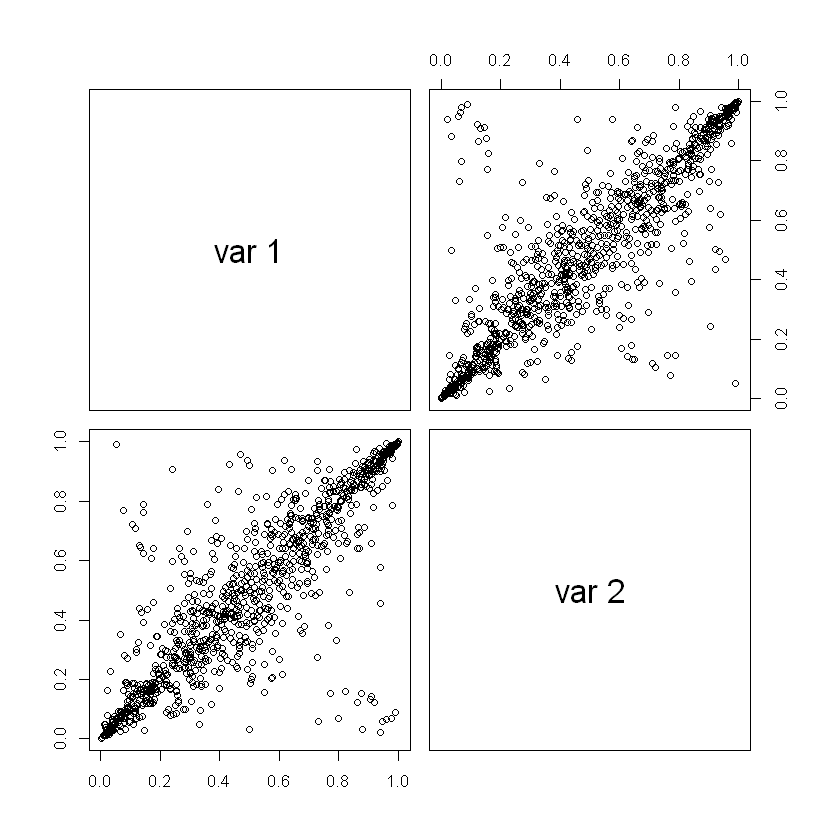

In [6]:
cop.norm = ellipCopula("t", param=c(0.9), dim=2, df=1, df.fixed=TRUE, dispstr = "un")
pairs(rCopula(1000, cop.norm))

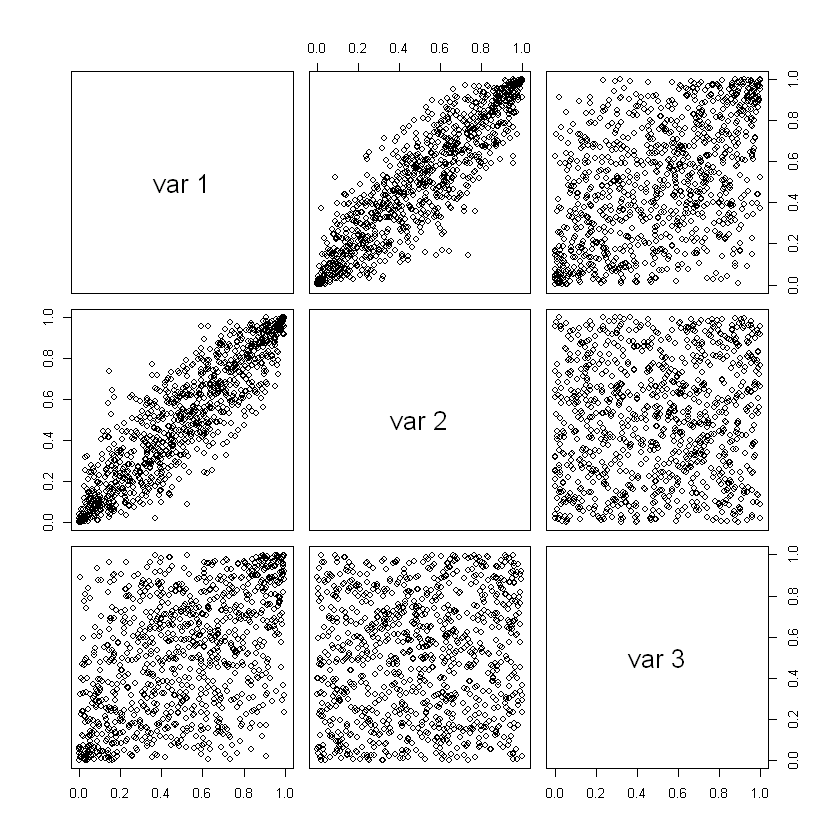

In [7]:
cop.norm = ellipCopula("t", param=c(0.9, 0.5, 0.1), dim=3, df=20, df.fixed=TRUE, dispstr = "un")
pairs(rCopula(1000, cop.norm))

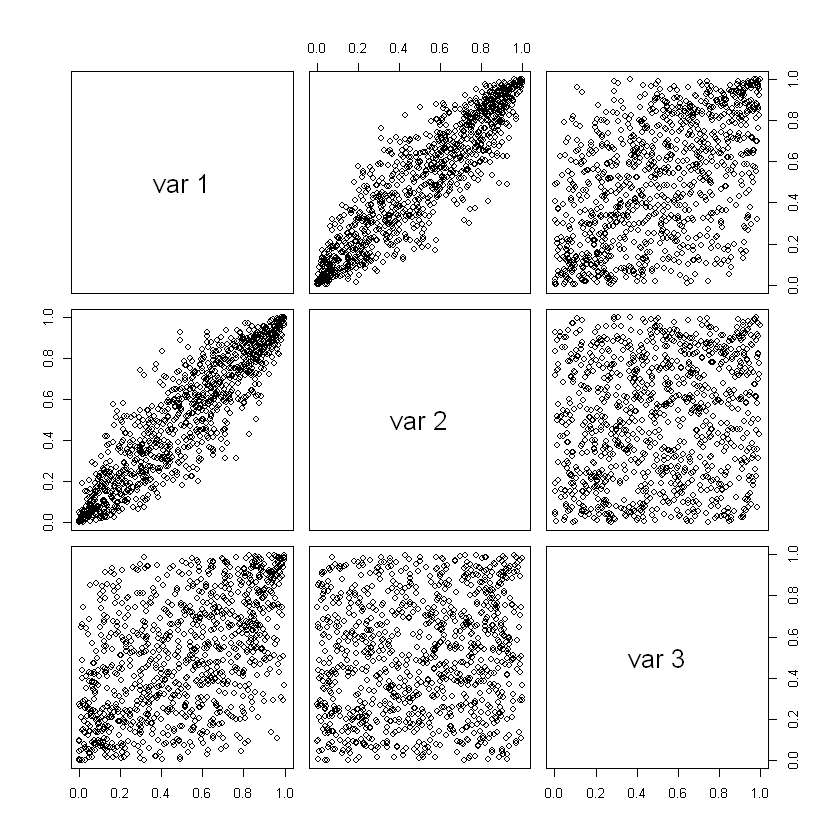

In [8]:
cop.norm = ellipCopula("normal", param=c(0.9, 0.5, 0.1), dim=3, dispstr = "un")
pairs(rCopula(1000, cop.norm))

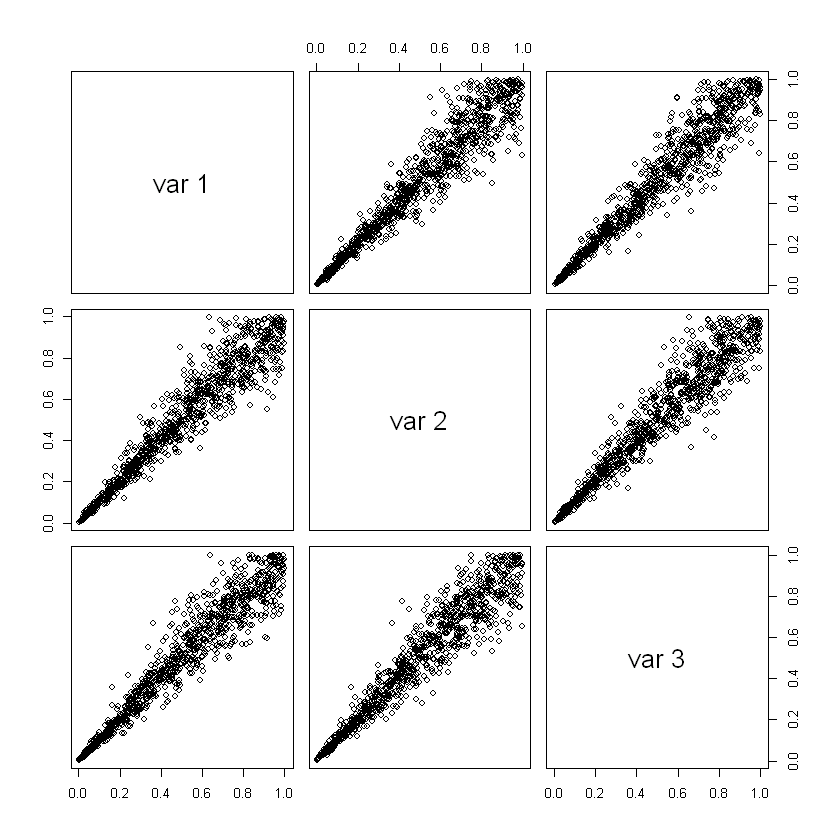

In [16]:
cop.clay = claytonCopula(param = c(10), dim=3)
pairs(rCopula(1000, cop.clay))